# **Milestone 1: Data Collection, Exploration, and Preprocessing**

## Install Required Libraries

## Load the Dataset

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Display first few rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## General Info and Summary Statistics

In [2]:
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

Summary Statistics:
                  id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000   5110.000000  

## Check Missing Values

In [3]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


## Handle Missing Values

In [4]:
# Fill missing BMI values with median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## Drop Irrelevant Columns

In [5]:
# Drop ID column
df.drop(columns=['id'], inplace=True)

## Encode Categorical Variables

In [6]:
# List categorical columns
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# One-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

## Save Cleaned Dataset

In [7]:
df.to_csv("cleaned_stroke_data.csv", index=False)
print("Cleaned dataset saved!")

Cleaned dataset saved!


# **Milestone 2: Data Analysis and Visualization**

## Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Cleaned Dataset

In [9]:
df = pd.read_csv("cleaned_stroke_data.csv")

## Stroke Distribution

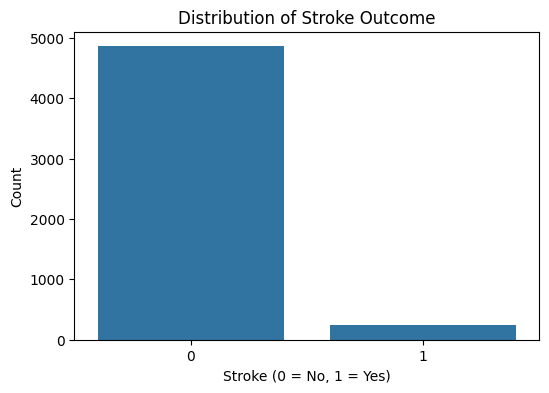

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke Outcome')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## Age vs Stroke

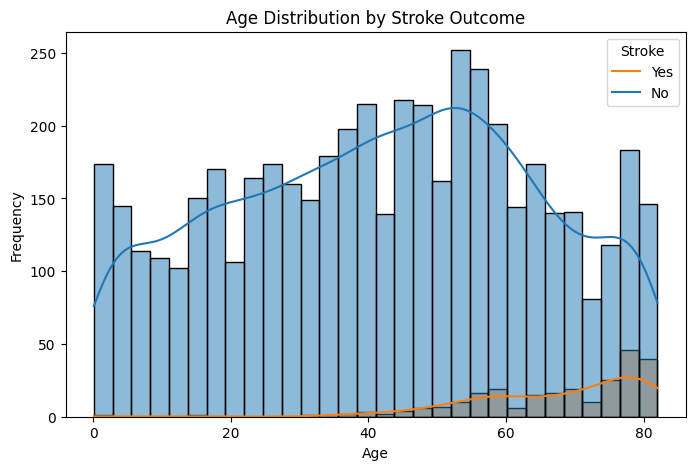

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', hue='stroke', bins=30, kde=True)
plt.title('Age Distribution by Stroke Outcome')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Stroke', labels=['Yes', 'No'])
plt.show()

## Gender vs Stroke

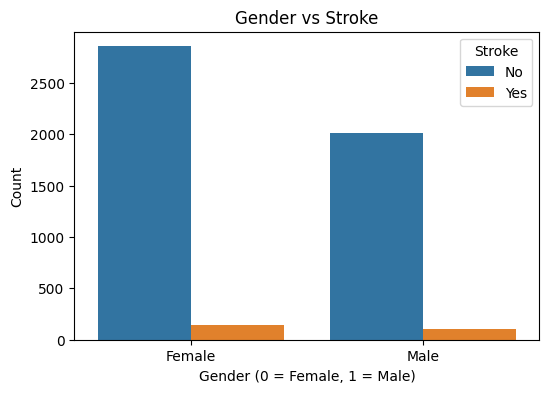

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender_Male', hue='stroke', data=df)
plt.title('Gender vs Stroke')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

## BMI vs Stroke

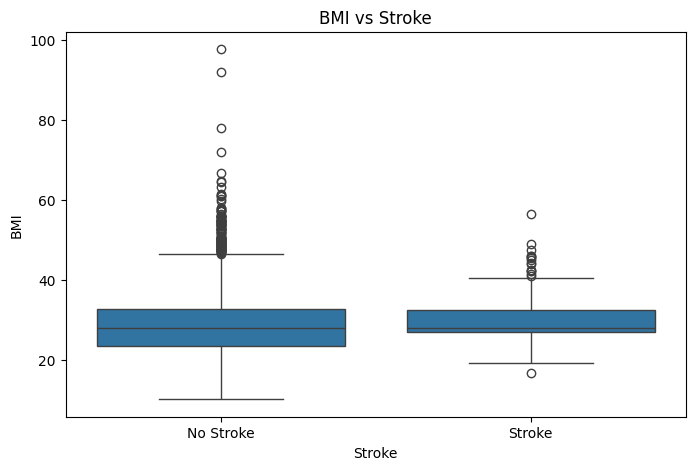

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title('BMI vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()

## Average Glucose Level vs Stroke

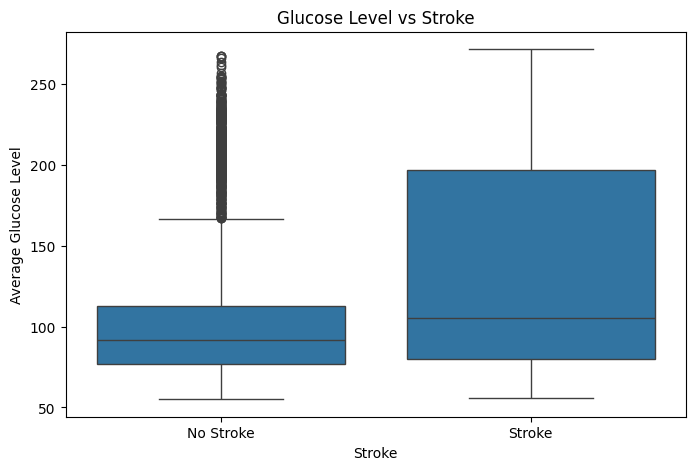

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Glucose Level vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()

## Correlation Matrix

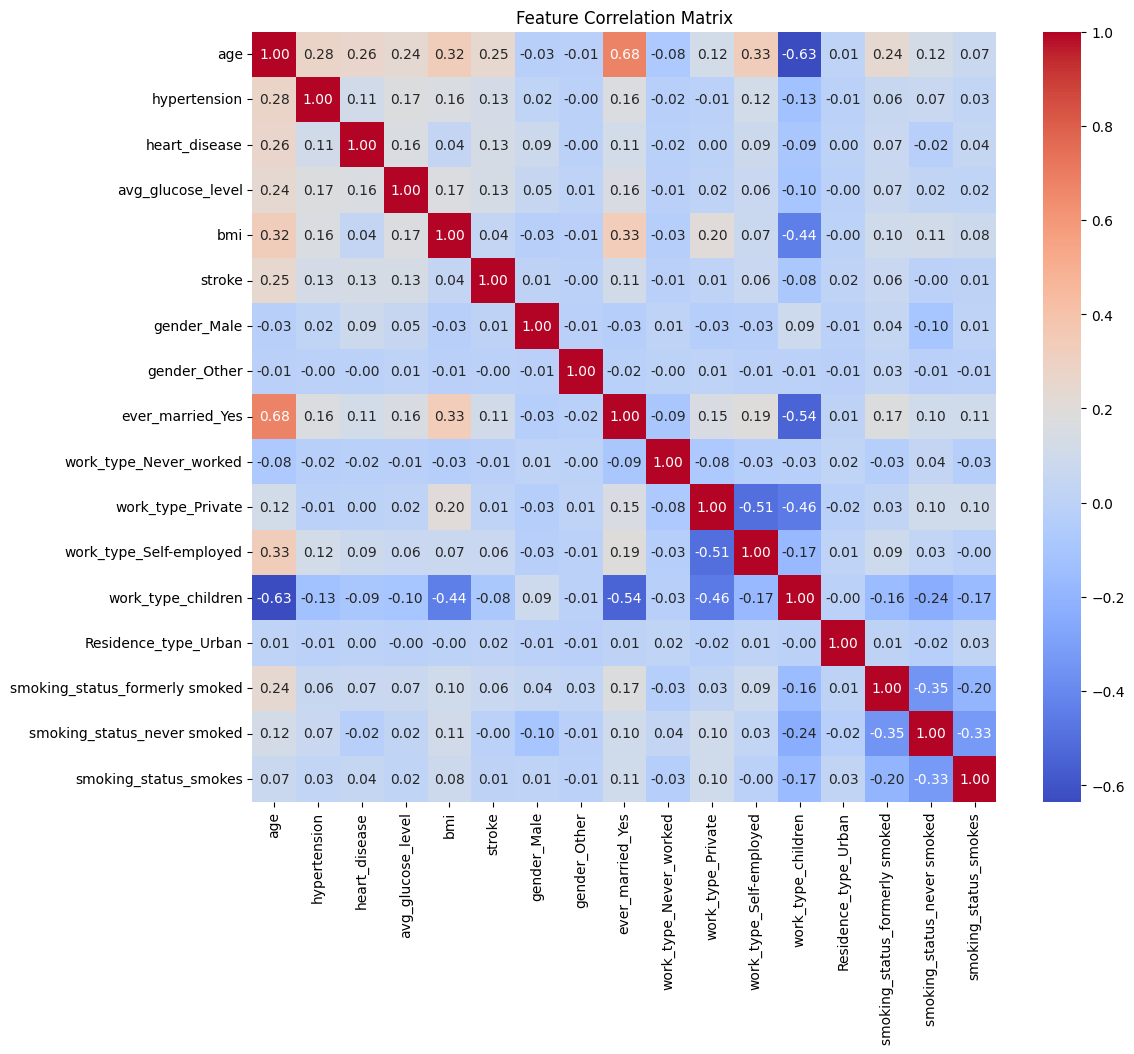

In [15]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

## Pairplot

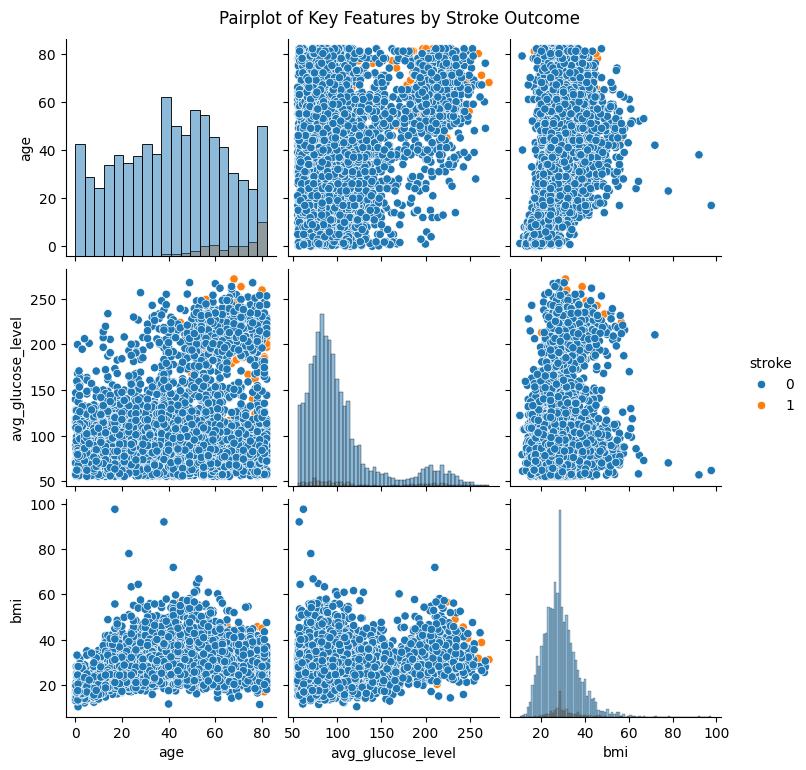

In [16]:
sns.pairplot(df[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke', diag_kind='hist')
plt.suptitle('Pairplot of Key Features by Stroke Outcome', y=1.02)
plt.show()

## Smoking Status vs Stroke

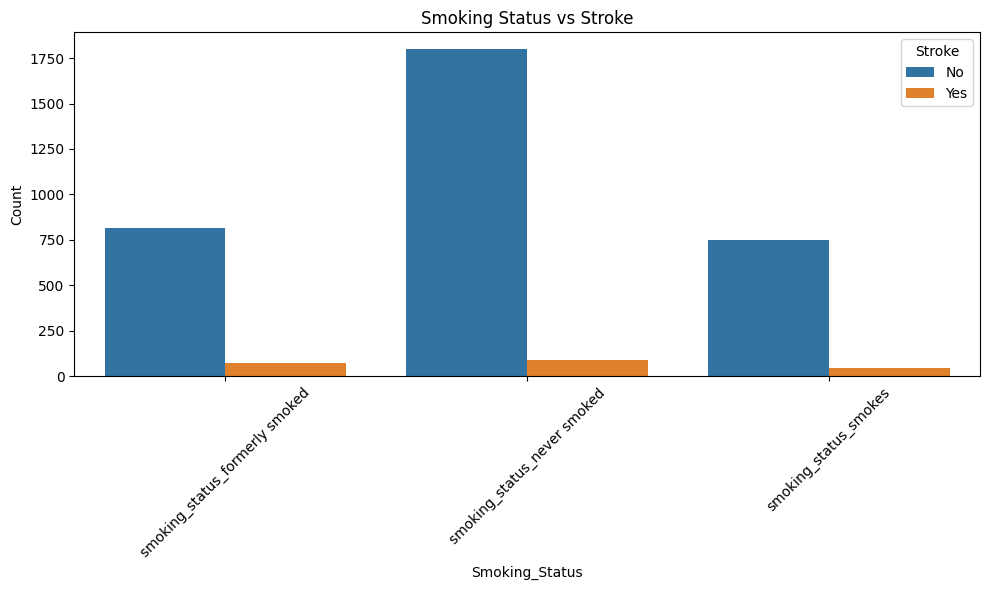

In [17]:
# Check which smoking status columns exist
smoking_cols = [col for col in df.columns if 'smoking_status' in col]

# Create a grouped bar chart
df_smoking = df[smoking_cols + ['stroke']].melt(id_vars='stroke', var_name='Smoking_Status', value_name='Value')

plt.figure(figsize=(10, 6))
sns.countplot(data=df_smoking[df_smoking['Value'] == 1], x='Smoking_Status', hue='stroke')
plt.title('Smoking Status vs Stroke')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Milestone 3: Predictive Model Development & Optimization**

## Import Required Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Load Cleaned Dataset

In [19]:
# Load cleaned dataset
df = pd.read_csv("cleaned_stroke_data.csv")

# Separate features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Define column types
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
binary_cols = ['hypertension', 'heart_disease']
# The dataset is already one-hot encoded, so all remaining columns are encoded categorical features
categorical_cols = [col for col in X.columns if col not in numerical_cols and col not in binary_cols]

## Preprocessing

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Preprocessing for numerical columns
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# For binary and categorical columns (which are already one-hot encoded),
# we'll use the same transformer since they're all numeric now
other_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Combine all columns for preprocessing
all_cols = numerical_cols + binary_cols + categorical_cols

# Create a transformer that applies the appropriate preprocessing to each column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('other', other_transformer, binary_cols + categorical_cols)
    ])

# Apply preprocessing to the full dataset
X_preprocessed = preprocessor.fit_transform(X)

## Train/Test Split

In [21]:
from sklearn.model_selection import train_test_split

# Split preprocessed data into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

## Train Multiple Models

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained.")

Logistic Regression trained.
Random Forest trained.
Decision Tree trained.
SVM trained.


## Evaluate Models

In [23]:
from sklearn.metrics import classification_report, roc_auc_score

results = {}

for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    # Use zero_division=0 to handle cases where precision is undefined
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    results[name] = {
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1': report['1']['f1-score'],
        'auc': auc
    }

# Display results
import pandas as pd

results_df = pd.DataFrame(results).T
print("\nModel Evaluation Results:")
print(results_df[['recall', 'precision', 'f1', 'auc']])


Model Evaluation Results:
                     recall  precision        f1       auc
Logistic Regression    0.02   1.000000  0.039216  0.841872
Random Forest          0.00   0.000000  0.000000  0.796533
Decision Tree          0.18   0.147541  0.162162  0.563251
SVM                    0.00   0.000000  0.000000  0.688272


## Choose the Best Model

In [24]:
best_model_name = results_df['recall'].idxmax()
best_model = trained_models[best_model_name]
print(f"Best Model: {best_model_name}")

Best Model: Decision Tree


## Improve the Best Model

### Class Weighting

In [25]:
# Example: Random Forest with class weights
rf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_weighted.fit(X_train, y_train)

y_pred = rf_weighted.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



### SMOTE Oversampling (Imbalanced Data)

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Retrain model on balanced data
rf_improved = RandomForestClassifier(random_state=42)
rf_improved.fit(X_res, y_res)

# Evaluate
y_pred = rf_improved.predict(X_test)
print(classification_report(y_test, y_pred))

c:\Users\Mohamed Mourad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Mohamed Mourad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.22      0.16      0.18        50

    accuracy                           0.93      1022
   macro avg       0.59      0.57      0.57      1022
weighted avg       0.92      0.93      0.93      1022



## Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', {0:1,1:5}]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1)

grid_search.fit(X_res, y_res)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


## Save the Best Model

In [28]:
# For deployment, we'll save just the best model from grid search
# This is simpler than trying to create a full pipeline with preprocessing
# since we already have preprocessed data

# Get best model from grid search
best_model = grid_search.best_estimator_

# Save the best model directly
import joblib

joblib.dump(best_model, 'stroke_prediction_model.pkl')
print("Final model saved as 'stroke_prediction_model.pkl'")

print("\nNote: This model expects preprocessed data. For a production environment,")
print("you would need to create a pipeline that includes preprocessing steps for raw data.")
print("The preprocessing should match exactly what was done during training.")

Final model saved as 'stroke_prediction_model.pkl'

Note: This model expects preprocessed data. For a production environment,
you would need to create a pipeline that includes preprocessing steps for raw data.
The preprocessing should match exactly what was done during training.


# **Milestone 4: MLOps, Deployment, and Monitoring**

## Create a Flask API for Model Deployment

In [29]:
# This code would typically be in a separate app.py file
# Here's a simplified version for reference

'''
from flask import Flask, request, jsonify, render_template
import pandas as pd
import numpy as np
import joblib

app = Flask(__name__)

# Load the trained model
model = joblib.load('stroke_prediction_model.pkl')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Get form data and process it
    # Make prediction
    # Return result
    pass

if __name__ == '__main__':
    app.run(debug=True)
'''

"\nfrom flask import Flask, request, jsonify, render_template\nimport pandas as pd\nimport numpy as np\nimport joblib\n\napp = Flask(__name__)\n\n# Load the trained model\nmodel = joblib.load('stroke_prediction_model.pkl')\n\n@app.route('/')\ndef home():\n    return render_template('index.html')\n\n@app.route('/predict', methods=['POST'])\ndef predict():\n    # Get form data and process it\n    # Make prediction\n    # Return result\n    pass\n\nif __name__ == '__main__':\n    app.run(debug=True)\n"

## Model Monitoring and Maintenance

In a production environment, you would implement:

1. Logging of predictions and outcomes
2. Monitoring for model drift
3. Periodic retraining with new data
4. A/B testing of model improvements